In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
df = pd.read_csv(r"C:\Users\singh\Documents\Data Science Projects\Practice\ML Projects\ML Project 1\notebook\StudentsPerformance.csv")

In [93]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [94]:
df['Total Score'] = df['math score'] + df['reading score'] + df['writing score']
df['Average Score'] = df['Total Score'] / 3

In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score,Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [96]:
X = df.drop(columns=['Total Score', 'writing score','Average Score'], axis=1, inplace=False) ## independent variables
y = df['writing score']  ## dependent variable

In [97]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group B,bachelor's degree,standard,none,72,72
1,female,group C,some college,standard,completed,69,90
2,female,group B,master's degree,standard,none,90,95
3,male,group A,associate's degree,free/reduced,none,47,57
4,male,group C,some college,standard,none,76,78


In [98]:
y.head()

0    74
1    88
2    93
3    44
4    75
Name: writing score, dtype: int64

In [99]:
X.shape

(1000, 7)

In [100]:
y.shape

(1000,)

In [101]:
numerical_cols = X.select_dtypes(exclude=['object']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    [
        ("OnehotEncoder", oh_transformer, categorical_cols),
        ("StandardScaler", numeric_transformer, numerical_cols)
    ])

In [102]:
X = preprocessor.fit_transform(X)

In [103]:
X.shape

(1000, 19)

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [105]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [106]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(true, predicted)
    return mae, mse, rmse, r2

In [107]:
models = {
    "LinearRegression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "CatBoost Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Classifier": AdaBoostRegressor()
}
model_list = []
r2_list = []

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae, mse, rmse, r2 = evaluate_model(y_test, y_pred)
    model_list.append(list(models.keys())[i])
    r2_list.append(r2)
    print(f"Model: {list(models.keys())[i]}")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R2 Score: {r2}")
    print("=========================================")

Model: LinearRegression
MAE: 3.200272452120669
MSE: 14.911021437246657
RMSE: 3.8614791773680013
R2 Score: 0.9381328994057507
Model: Lasso
MAE: 3.896387495370665
MSE: 24.261636053615288
RMSE: 4.925610221446201
R2 Score: 0.8993364012903436
Model: Ridge
MAE: 3.200537548710185
MSE: 14.90865902255262
RMSE: 3.8611732702059123
R2 Score: 0.9381427012659477
Model: KNeighborsRegressor
MAE: 4.17
MSE: 28.800000000000004
RMSE: 5.366563145999495
R2 Score: 0.8805063419288206
Model: Decision Tree
MAE: 4.495
MSE: 32.375
RMSE: 5.689903338370521
R2 Score: 0.8656733618036655
Model: Random Forest Regressor
MAE: 3.6044624999999995
MSE: 20.123468537916665
RMSE: 4.485918917893709
R2 Score: 0.9165060115043073
Model: XGBRegressor
MAE: 3.5652849674224854
MSE: 20.37509536743164
RMSE: 4.513878085131635
R2 Score: 0.9154620170593262
Model: CatBoost Regressor
MAE: 3.4961306839593203
MSE: 20.053823184918166
RMSE: 4.478149526860192
R2 Score: 0.9167949760181076
Model: AdaBoost Classifier
MAE: 3.67708794382022
MSE: 21.98

In [108]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model', 'R2 Score']).sort_values(by='R2 Score', ascending=False)

,Model,R2 Score
2,Ridge,0.938143
0,LinearRegression,0.938133
7,CatBoost Regressor,0.916795
5,Random Forest Regressor,0.916506
6,XGBRegressor,0.915462
8,AdaBoost Classifier,0.908786
1,Lasso,0.899336
3,KNeighborsRegressor,0.880506
4,Decision Tree,0.865673


In [109]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"R2 Score of Linear Regression Model: {score}")

R2 Score of Linear Regression Model: 93.81328994057507


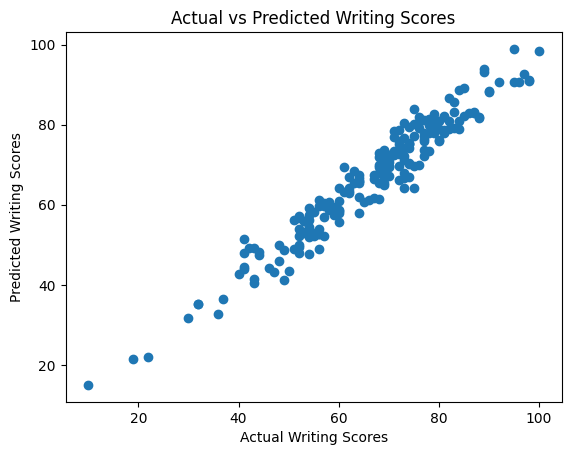

In [110]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Writing Scores")
plt.ylabel("Predicted Writing Scores")
plt.title("Actual vs Predicted Writing Scores")
plt.show()

<Axes: xlabel='writing score'>

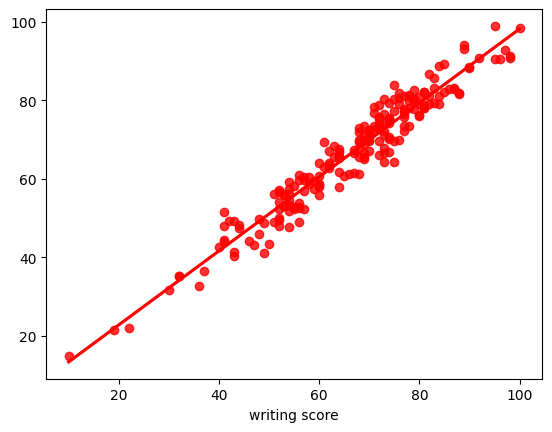

In [112]:
sns.regplot(x=y_test, y=y_pred, ci=None, color ='r')

In [113]:
pred_df=pd.DataFrame({'Actual Writing Score': y_test, 'Predicted Writing Score': y_pred, 'Difference': y_test - y_pred})

In [114]:
print(pred_df)

     Actual Writing Score  Predicted Writing Score  Difference
521                    84                88.634480   -4.634480
737                    73                66.631764    6.368236
740                    72                73.579121   -1.579121
660                    73                71.251040    1.748960
411                    78                79.864976   -1.864976
..                    ...                      ...         ...
408                    56                61.104902   -5.104902
332                    53                56.064994   -3.064994
208                    76                79.073317   -3.073317
613                    74                75.164915   -1.164915
78                     72                75.241410   -3.241410

[200 rows x 3 columns]
